## Handwritten digit classification

In [29]:
pip install tensorflow

## Load MNIST dataset

In [1]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


##  Data preprocessing (normalization)

In [2]:
X_train, X_test = X_train/255., X_test/255
#print(X_train[0])

## Data visualization

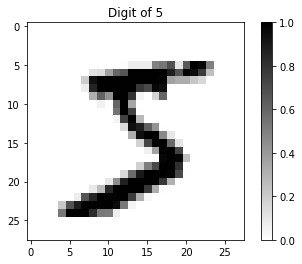

In [3]:
import matplotlib.pyplot as plt

#plt.imshow(X_train[0], cmap='gray') # cmap: grayscaleDimage (blackground is black)
plt.imshow(X_train[0], cmap='gray_r') # gray_r: background is white
plt.colorbar() # Display a colored bar right next to an image
plt.title('Digit of {}'.format(y_train[0]))
plt.show()

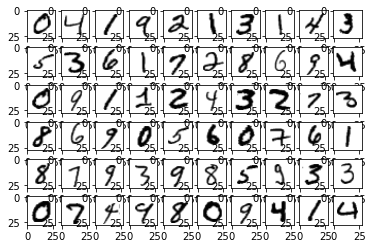

In [4]:
num_of_images = 60
for index in range(1,num_of_images+1):
    plt.subplot(6,10,index)
    plt.imshow(X_train[index], cmap = 'gray_r')

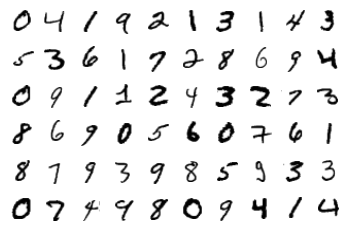

In [5]:
num_of_images = 60
for index in range(1,num_of_images+1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(X_train[index], cmap = 'gray_r')

## Least Squares

In [6]:
from sklearn.linear_model import RidgeClassifier

Model_LS = RidgeClassifier()

In [7]:
print(X_train.shape)

(60000, 28, 28)


In [8]:
print(X_train.reshape(-1,28*28).shape)

(60000, 784)


In [9]:
# training 
Model_LS.fit(X_train.reshape(-1, 28*28), y_train)

RidgeClassifier()

In [10]:
# prediction on test data
Model_LS.predict(X_test[0].reshape(1, -1))

array([7], dtype=uint8)

In [11]:
# evaluate test accuracy
Model_LS.score(X_test.reshape(-1, 28*28), y_test)


0.8604

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [15]:
Model_LR = LogisticRegression()
#Model_LR = LogisticRegression(max_iter=1000)


# training 
Model_LR.fit(X_train.reshape(-1, 28*28), y_train)

# prediction on test data
Model_LR.predict(X_test[0].reshape(1,-1))

# evaluate test accuracy
Model_LR.score(X_test.reshape(-1, 28*28), y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9258

## Deep learning

In [16]:
from tensorflow.keras.models import Sequential

Model_NN = Sequential()

In [17]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Model_NN.add(Flatten(input_shape=(28,28)))
Model_NN.add(Dense(128, activation='relu'))
Model_NN.add(Dense(10, activation='softmax'))
Model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile

In [18]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=1e-2,
           beta_1 = 0.9,
           beta_2 = 0.999)

Model_NN.compile(optimizer=opt, 
                 loss='sparse_categorical_crossentropy',
                 metrics=['acc'])
#Model_NN.compile(optimizer=opt, 
#                 loss='sparse_categorical_crossentropy')


In [19]:
#training 
hist = Model_NN.fit(X_train, y_train, epochs=20) 

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2416 - acc: 0.9272
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1652 - acc: 0.9541
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1435 - acc: 0.9618
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1367 - acc: 0.9641
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1242 - acc: 0.9671
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1200 - acc: 0.9692
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - acc: 0.9719
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - acc: 0.9722
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1050 - acc: 0.9739
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - acc: 0.9759
Epoch 11/20
1875/1875 [======

In [20]:
type(hist.history)

dict

In [21]:
print(hist.history)

{'loss': [0.24156583845615387, 0.16521234810352325, 0.14347364008426666, 0.13668259978294373, 0.12416446208953857, 0.11997131258249283, 0.10932151228189468, 0.10816869884729385, 0.10496284067630768, 0.09953494369983673, 0.09505098313093185, 0.09694553166627884, 0.09167813509702682, 0.09112296998500824, 0.0927160233259201, 0.08849912136793137, 0.08636107295751572, 0.08310181647539139, 0.08160661906003952, 0.08067270368337631], 'acc': [0.927216649055481, 0.9540500044822693, 0.961816668510437, 0.9641333222389221, 0.9670500159263611, 0.9692000150680542, 0.9718833565711975, 0.9721666574478149, 0.9739000201225281, 0.9758833050727844, 0.9768499732017517, 0.9773499965667725, 0.9780666828155518, 0.9792333245277405, 0.9794666767120361, 0.9804333448410034, 0.9808666706085205, 0.98253333568573, 0.9821333289146423, 0.9828000068664551]}


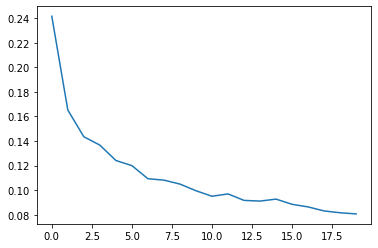

In [22]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['loss']) 
plt.show()

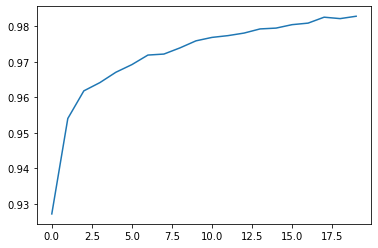

In [23]:
plt.plot(hist.history['acc'])
plt.show()

In [24]:
Model_NN.predict(X_test[0].reshape(1,28,28)).argmax(1)

1/1 [==============================] - 0s 51ms/step


array([7], dtype=int64)

In [25]:
# evaluation (loss & accuracy)

Model_NN.evaluate(X_test, y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 0.3611 - acc: 0.9643


[0.36111539602279663, 0.9642999768257141]